In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

import nltk
nltk.download('punkt_tab')
import contractions

from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer




from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model


from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score, precision_score

[nltk_data] Downloading package punkt_tab to /Users/mek/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
df = pd.read_csv('0_documents/train.csv')
# df_test = pd.read_csv('0_documents/test.csv')
# df_submission = pd.read_csv('0_documents/sample_submission.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
columns = ['text', 'target']

In [6]:
stop_words = stopwords.words('english')

for i in ['no', 'not']:
    stop_words.remove(i)

In [7]:
def cleaning(data):
    
    # Step-1 Remove URLS
    data = re.sub('https\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    # Step-2 Remove tags
    data = re.sub('#\S*', '', data).strip()

    # Step-3 Remove Mentions
    data = re.sub('@\S*', '', data).strip()

    # Step-4 Correcttion of text
    spell = Speller(fast=False)
    correction_data = spell(data)

    # Step-5 Contraction of text
    contraction_data = contractions.fix(correction_data)

    # Step-6 Tokinize and lowercase
    text_tokens = word_tokenize(contraction_data.lower())

    # Step-7 Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    # Step-8 Remove Stopwords
    tokens_without_sw = [w for w in tokens_without_punc if w not in stop_words]

    # Step-9 Lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(w) for w in tokens_without_sw]

    # Step-10 Joining
    return ' '.join(text_cleaned)

In [8]:
df['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [11]:
X = df['text']
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,aaaaaa,ab,aba,abandoned,abbswinston,abcnews,ability,ablaze,able,...,york,young,youth,youtube,yr,zombie,zone,zoom,åè,åê
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
# Initiallize models 
nb = MultinomialNB()
log = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier()
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)


models = {'Naive Bayes': nb,
          'Logistic Regression': log,
          'SVC': svc,
          'KNN': knn,
          'Random Forest': rf,
          'Ada Boost': ada
          }

# model_results = {model_name: [] for model_name in models.keys()}
model_results = []

for model_name, model in models.items():
    for X_train, X_test in [(X_train_count, X_test_count), (X_train_tf_idf, X_test_tf_idf)]:
        vector_type = 'count' if X_train is X_train_count  else 'tf-idf'
        
        model.fit(X_train, y_train)

        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        metrics = {
            'model_name': model_name + '_' + vector_type,
            'accuracy_test': accuracy_score(y_test, y_pred_test),
            'accuracy_train' : accuracy_score(y_train, y_pred_train),
            'precision_test' : precision_score(y_test, y_pred_test),
            'precision_train' : precision_score(y_train, y_pred_train),
            'recall_test' : recall_score(y_test, y_pred_test),
            'recall_train' : recall_score(y_train, y_pred_train),
            'f1_test': f1_score(y_test, y_pred_test),
            'f1_train': f1_score(y_train, y_pred_train) 
        }

        # Collect evaluation metrics
        model_results.append(metrics)


df_result = pd.DataFrame(model_results)

df_last = df_result.set_index('model_name').T

/Users/mek/miniconda3/envs/inlp/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/mek/miniconda3/envs/inlp/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [133]:
df_last

model_name,Naive Bayes_count,Naive Bayes_tf-idf,Logistic Regression_count,Logistic Regression_tf-idf,SVC_count,SVC_tf-idf,KNN_count,KNN_tf-idf,Random Forest_count,Random Forest_tf-idf,Ada Boost_count,Ada Boost_tf-idf
accuracy_test,0.798424,0.809586,0.796454,0.804990,0.812869,0.804990,0.710440,0.696651,0.744583,0.780696,0.787262,0.761655
accuracy_train,0.846962,0.846798,0.901970,0.858292,0.924138,0.948933,0.842857,0.739901,0.982923,0.982759,0.859770,0.887192
precision_test,0.790620,0.839552,0.787625,0.823956,0.856867,0.833645,0.678992,0.877953,0.704791,0.783688,0.763578,0.724884
precision_train,0.859275,0.894195,0.934596,0.905643,0.969499,0.974876,0.880385,0.946413,0.984574,0.987199,0.872412,0.901414
recall_test,0.721713,0.688073,0.720183,0.694190,0.677370,0.681957,0.617737,0.340979,0.697248,0.675841,0.730887,0.717125
recall_train,0.769966,0.729843,0.829958,0.748185,0.850210,0.904471,0.734047,0.418418,0.975545,0.972488,0.789071,0.828047
f1_test,0.754596,0.756303,0.752396,0.753527,0.756618,0.750210,0.646918,0.491189,0.700999,0.725780,0.746875,0.720984
f1_train,0.812173,0.803703,0.879174,0.819418,0.905945,0.938355,0.800583,0.580286,0.980038,0.979788,0.828652,0.863175


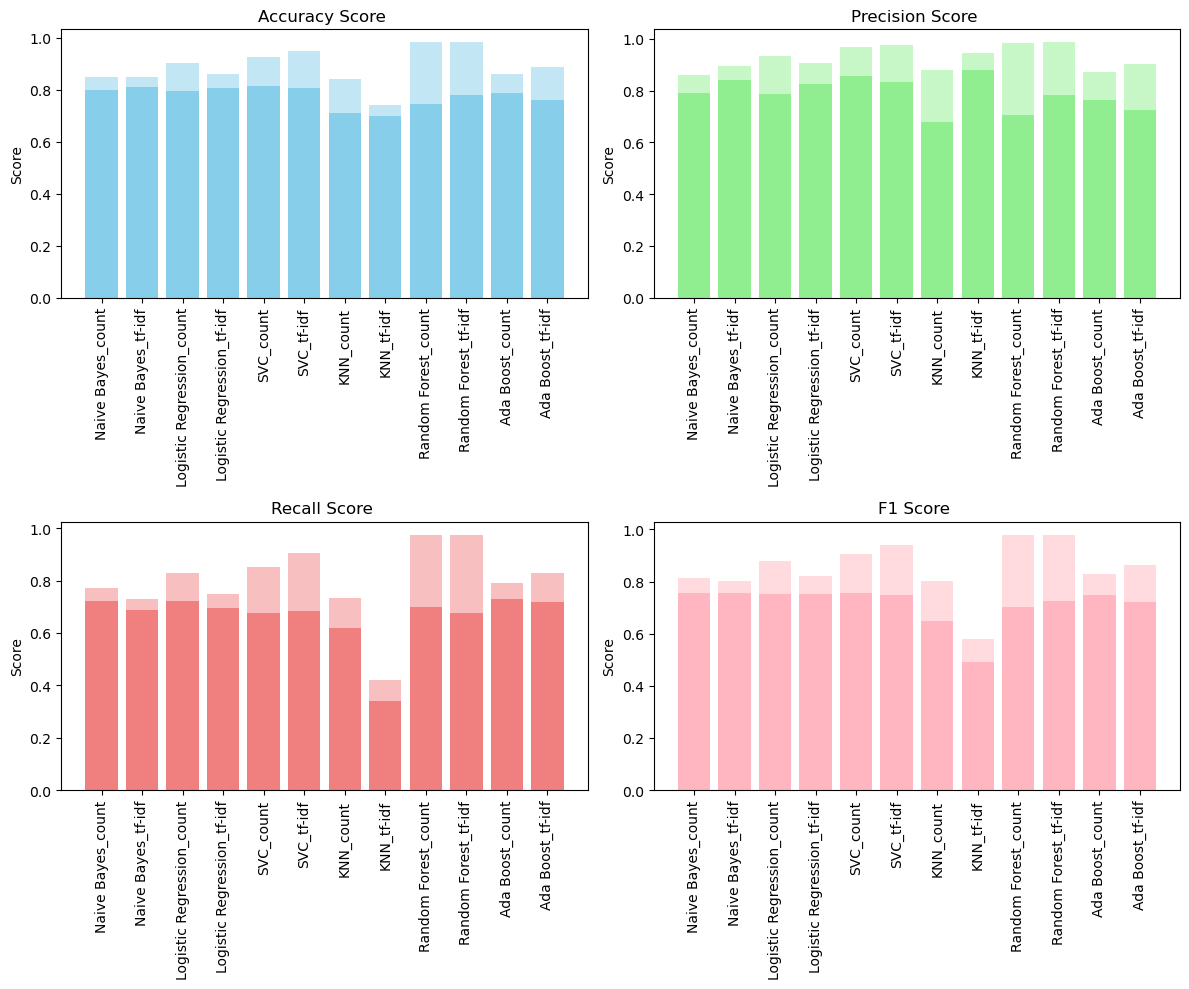

In [139]:
## Visualization

imetrics_test = ['accuracy_test', 'precision_test', 'recall_test',  'f1_test']
imetrics_train = ['accuracy_train', 'precision_train', 'recall_train',  'f1_train']

icolors_test = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink']
icolors_train = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for ax, imetric, icolor in zip(axs, imetrics_test, icolors_test):
    ax.bar(df_last.columns, df_last.loc[imetric], color=icolor)
    ax.tick_params(axis='x', rotation=90)  # Correct method to rotate labels
    ax.set_title(imetric.replace('_test', ' Score').title())
    ax.set_ylabel('Score')
    # ax.set_ylim(0.6, 1.0)

for ax, imetric, icolor in zip(axs, imetrics_train, icolors_train):
    ax.bar(df_last.columns, df_last.loc[imetric], color=icolor, alpha=0.5)
    ax.tick_params(axis='x', rotation=90)  # Correct method to rotate labels
    ax.set_title(imetric.replace('_train', ' Score ').title())
    ax.set_ylabel('Score')
    # ax.set_ylim(0.6, 1.0)


plt.tight_layout()
